# Part 1: Know your metrics

In [1]:
## The North Star Metric is the single metric that best captures the core value that your product delivers to customers

In [1]:
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



In [2]:
raw_data = pd.read_csv("C:/Users/lizil/Dropbox/Job/Kaggle/Retail/kaggle_retail/OnlineRetail.csv",encoding= 'unicode_escape')

In [3]:
raw_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Metric: Monthly Revenue

In [5]:
## Deal with date time format variable
raw_data['InvoiceDate1'] = pd.to_datetime(raw_data['InvoiceDate'])
raw_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01 08:34:00


In [7]:
## use pd.series.map() function to replace each of the original value to another
raw_data['InvoiceYearMonth'] = raw_data['InvoiceDate1'].map(lambda date: date.year*100+date.month)

In [8]:
## calculate revenue
raw_data['Revenue']=raw_data['UnitPrice']*raw_data['Quantity']

In [16]:
## find monthly revenue by grouping revenue with date
m_revenue = raw_data.groupby(raw_data['InvoiceYearMonth'])['Revenue'].sum().reset_index()
m_revenue.head(10)

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [17]:
test = raw_data[['InvoiceYearMonth','Revenue']].groupby('InvoiceYearMonth').agg(['sum','mean','min','max','count']).sort_values(by = [('Revenue','mean')], ascending=False).reset_index()
test.head(10)

InvoiceYearMonth      Revenue                                      
                            sum       mean       min       max  count
0           201109  1019687.622  20.301987  -7427.97   7144.72  50226
1           201105   723333.510  19.533716  -8142.75   8142.75  37030
2           201108   682680.510  19.348161 -11062.06  11062.06  35284
3           201106   691123.120  18.742830 -38970.00  38970.00  36874
4           201103   683267.080  18.593313  -5693.05   2583.76  36748
5           201102   498062.650  17.976058  -5575.28   3215.52  27707
6           201012   748957.020  17.630400 -13541.33  13541.33  42481
7           201110  1070704.670  17.627089  -8322.12   4992.00  60742
8           201111  1461756.250  17.255802  -8286.22   4781.60  84711
9           201107   681300.111  17.240248  -6497.47   4287.63  39518

In [18]:
## add back the datetime format variable
m_revenue['Date']=m_revenue['InvoiceYearMonth'].map(lambda x: datetime(year = x//100, month = x%100, day = 1))

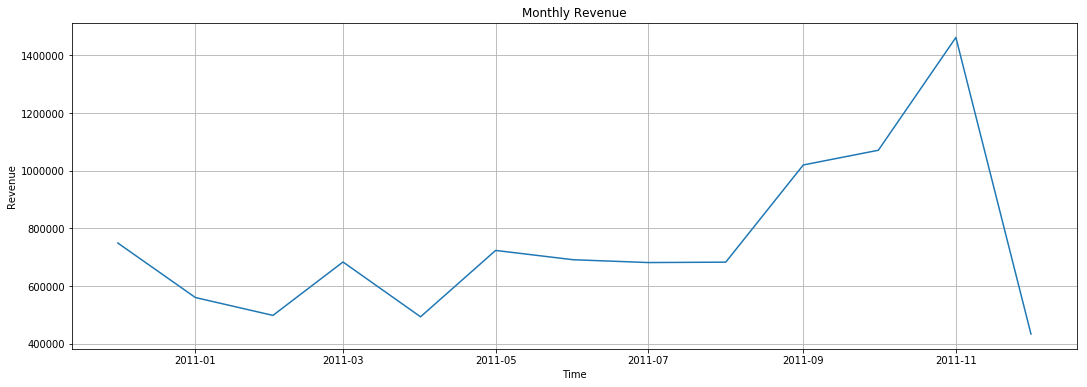

In [19]:
## Visualize the Monthly Revenue

fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="Date", y="Revenue", data = m_revenue)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Revenue")
plt.show()

In [20]:
## Calculate and Visualize Monthly Growth

m_revenue['MonthlyGrowth']=m_revenue['Revenue'].pct_change()
m_revenue.head(10)

,InvoiceYearMonth,Revenue,Date,MonthlyGrowth
0,201012,748957.020,2010-12-01,NaN
1,201101,560000.260,2011-01-01,-0.252293
2,201102,498062.650,2011-02-01,-0.110603
3,201103,683267.080,2011-03-01,0.371850
4,201104,493207.121,2011-04-01,-0.278163
5,201105,723333.510,2011-05-01,0.466592
6,201106,691123.120,2011-06-01,-0.044530
7,201107,681300.111,2011-07-01,-0.014213
8,201108,682680.510,2011-08-01,0.002026
9,201109,1019687.622,2011-09-01,0.493653


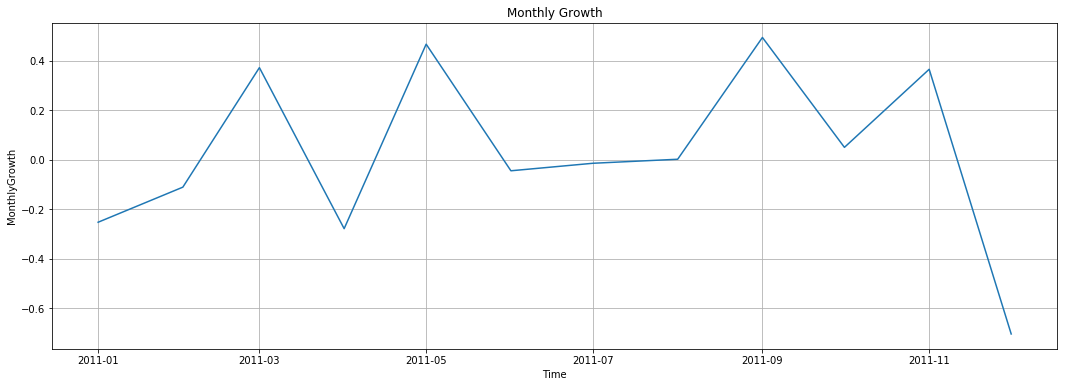

In [21]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="Date", y="MonthlyGrowth", data = m_revenue)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Growth")
plt.show()

## Metric: Monthly Active Customers (UK as Example)

In [9]:
uk_data = raw_data[raw_data['Country']=='United Kingdom'].reset_index(drop=True)
uk_monthly_active = uk_data.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
uk_monthly_active.head(10)

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In [15]:
## Visualize the Active Monthly users and percentage change
uk_monthly_active['date']=uk_monthly_active['InvoiceYearMonth'].map(lambda x: datetime(year = x//100, month = x%100, day =1 ))
uk_monthly_active['CustomerChange']=uk_monthly_active['CustomerID'].pct_change()
uk_monthly_active.head(10)

,InvoiceYearMonth,CustomerID,date,CustomerChange
0,201012,871,2010-12-01,NaN
1,201101,684,2011-01-01,-0.214696
2,201102,714,2011-02-01,0.043860
3,201103,923,2011-03-01,0.292717
4,201104,817,2011-04-01,-0.114843
5,201105,985,2011-05-01,0.205630
6,201106,943,2011-06-01,-0.042640
7,201107,899,2011-07-01,-0.046660
8,201108,867,2011-08-01,-0.035595
9,201109,1177,2011-09-01,0.357555


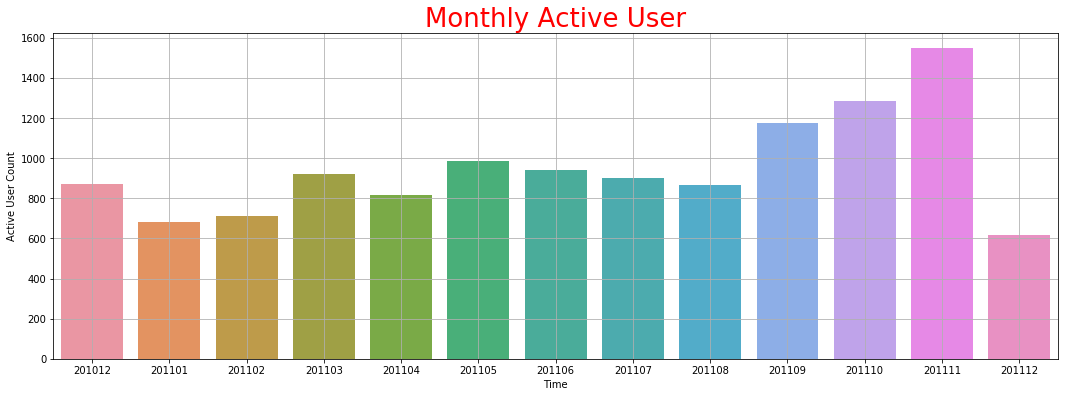

In [16]:
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x ="InvoiceYearMonth", y="CustomerID", data = uk_monthly_active)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Active User Count")
plt.title("Monthly Active User",fontsize=26,color="Red")
plt.show()

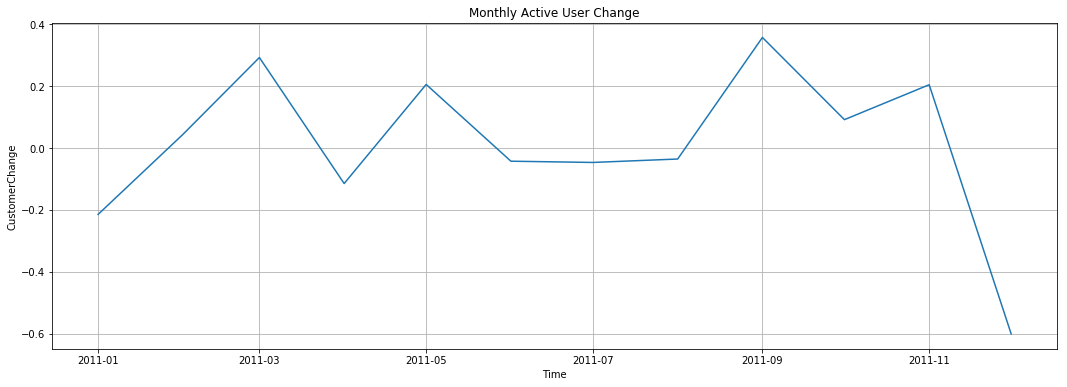

In [17]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="date", y="CustomerChange", data = uk_monthly_active)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Active User Change")
plt.show()

## Metric: Monthly Average Revenue Per Order

In [18]:
m_avg_revenue = raw_data.groupby(raw_data['InvoiceYearMonth'])['Revenue'].mean().reset_index()
m_avg_revenue['Date']=m_avg_revenue['InvoiceYearMonth'].map(lambda x: datetime(year = x//100, month = x%100, day = 1))
m_avg_revenue['RevenueDiff']=m_avg_revenue['Revenue'].pct_change()
m_avg_revenue.head(10)

,InvoiceYearMonth,Revenue,Date,RevenueDiff
0,201012,17.630400,2010-12-01,NaN
1,201101,15.933088,2011-01-01,-0.096272
2,201102,17.976058,2011-02-01,0.128222
3,201103,18.593313,2011-03-01,0.034338
4,201104,16.486399,2011-04-01,-0.113316
5,201105,19.533716,2011-05-01,0.184838
6,201106,18.742830,2011-06-01,-0.040488
7,201107,17.240248,2011-07-01,-0.080168
8,201108,19.348161,2011-08-01,0.122267
9,201109,20.301987,2011-09-01,0.049298


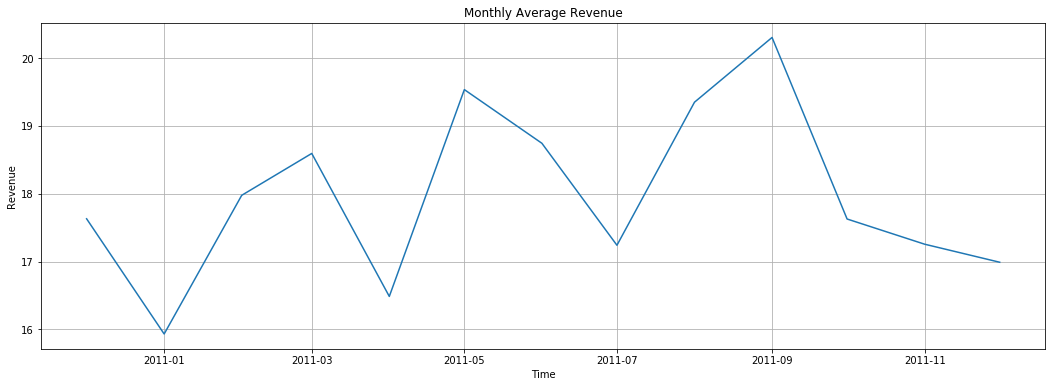

In [19]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="Date", y="Revenue", data = m_avg_revenue)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Average Revenue")
plt.show()

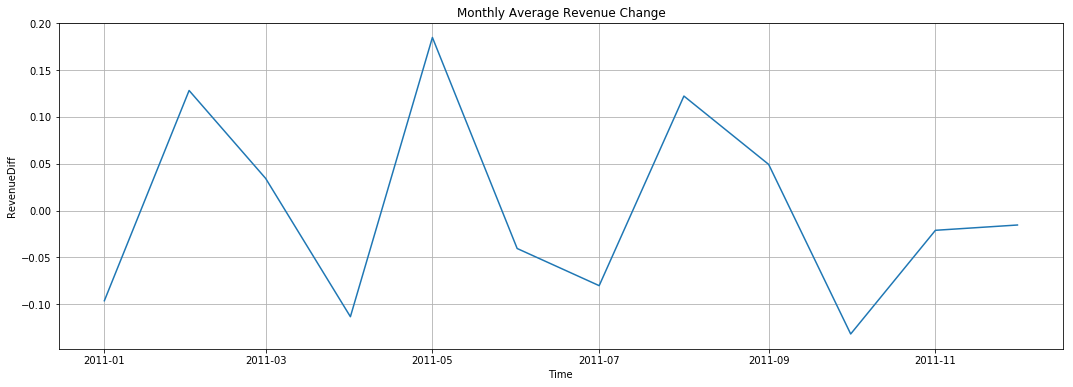

In [20]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="Date", y="RevenueDiff", data = m_avg_revenue)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Average Revenue Change")
plt.show()

## Metric: New Customer Ratio (UK as example)

In [21]:
## the key point is how to define new customer and how to use current dataset to find it
uk_min_purchase = uk_data[['InvoiceDate1','CustomerID']].groupby('CustomerID').min().reset_index()
uk_min_purchase.columns = ['CustomerID','MinPurchaseDate']
uk_min_purchase['MinPurchaseMonth']=uk_min_purchase['MinPurchaseDate'].map(lambda x: x.year*100+x.month)
uk_new_data = pd.merge(uk_data, uk_min_purchase, on = 'CustomerID')
uk_new_data.head(10)

## find the min purchase date of each customer, merge back to main dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,201012,20.34,2010-12-01 08:26:00,201012
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,201012,15.30,2010-12-01 08:26:00,201012
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,201012,25.50,2010-12-01 08:26:00,201012
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,201012,11.10,2010-12-01 08:26:00,201012
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,201012,11.10,2010-12-01 08:26:00,201012
9,536372,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 9:01,1.85,17850.0,United Kingdom,2010-12-01 09:01:00,201012,11.10,2010-12-01 08:26:00,201012


In [23]:
## create new variable to differential new and existing customer
uk_new_data['UserType']='New'
uk_new_data.loc[uk_new_data['InvoiceYearMonth']>uk_new_data['MinPurchaseMonth'],'UserType']='Existing'


In [24]:
uk_new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 361877
Data columns (total 14 columns):
InvoiceNo           361878 non-null object
StockCode           361878 non-null object
Description         361878 non-null object
Quantity            361878 non-null int64
InvoiceDate         361878 non-null object
UnitPrice           361878 non-null float64
CustomerID          361878 non-null float64
Country             361878 non-null object
InvoiceDate1        361878 non-null datetime64[ns]
InvoiceYearMonth    361878 non-null int64
Revenue             361878 non-null float64
MinPurchaseDate     361878 non-null datetime64[ns]
MinPurchaseMonth    361878 non-null int64
UserType            361878 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(6)
memory usage: 41.4+ MB


## Metric: New Customer Ratio

In [25]:
## monthly revenue for new/existing customers
uk_type_revenue = uk_new_data[['InvoiceYearMonth','UserType','Revenue']].groupby(['InvoiceYearMonth','UserType']).sum().reset_index()
uk_type_revenue.head(10)

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


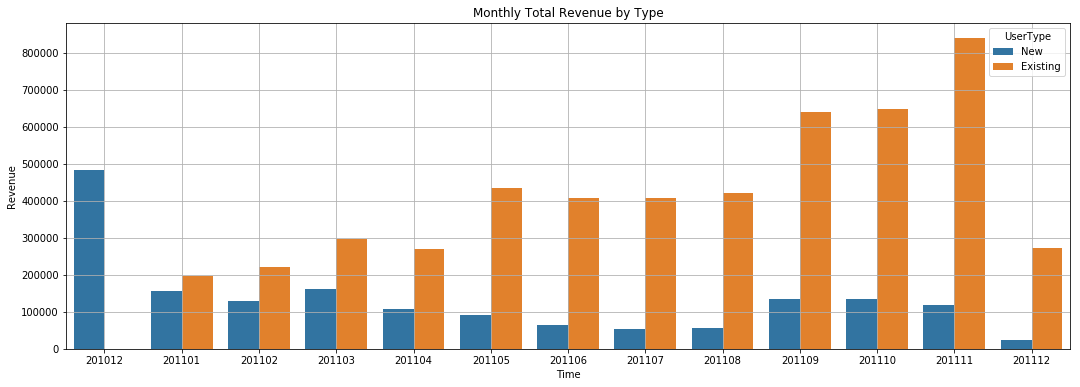

In [27]:
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x ="InvoiceYearMonth", y="Revenue",hue="UserType", data = uk_type_revenue)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Total Revenue by Type")
plt.show()

In [28]:
uk_type_revenue1 = uk_new_data[['InvoiceYearMonth','UserType','Revenue']].groupby(['InvoiceYearMonth','UserType']).mean().reset_index()
uk_type_revenue1.head(10)

,InvoiceYearMonth,UserType,Revenue
0,201012,New,19.717955
1,201101,Existing,20.458409
2,201101,New,17.046206
3,201102,Existing,21.730052
4,201102,New,16.103149
5,201103,Existing,20.270180
6,201103,New,16.109947
7,201104,Existing,18.394367
8,201104,New,16.015016
9,201105,Existing,21.270470


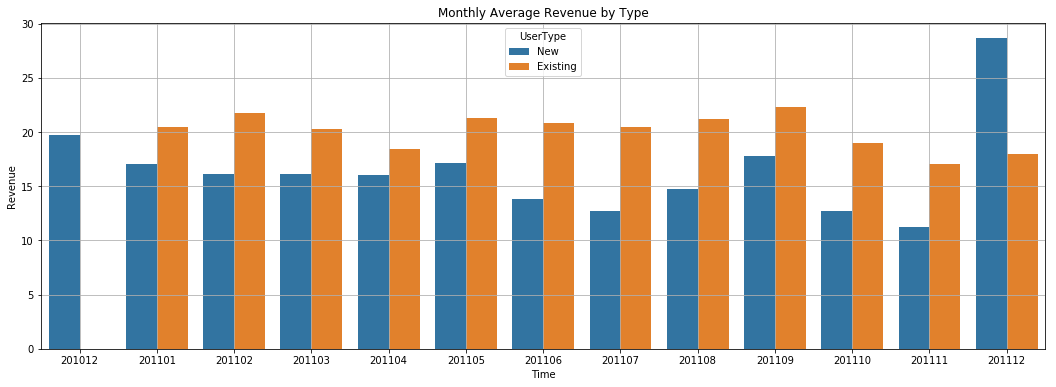

In [29]:
## average monthly revenue by type
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x ="InvoiceYearMonth", y="Revenue",hue="UserType", data = uk_type_revenue1)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Average Revenue by Type")
plt.show()

In [44]:
uk_new_ratio = uk_new_data[uk_new_data['UserType']=='New'][['CustomerID','InvoiceYearMonth']].groupby('InvoiceYearMonth').nunique()/uk_new_data[uk_new_data['UserType']=='Existing'][['CustomerID','InvoiceYearMonth']].groupby('InvoiceYearMonth').nunique()
uk_new = uk_new_ratio.iloc[:,:1]
uk_new = uk_new.dropna().reset_index()

In [45]:
uk_new

,InvoiceYearMonth,CustomerID
0,201101,1.124224
1,201102,0.904000
2,201103,0.792233
3,201104,0.510166
4,201105,0.343793
5,201106,0.281250
6,201107,0.236589
7,201108,0.192572
8,201109,0.304878
9,201110,0.328852


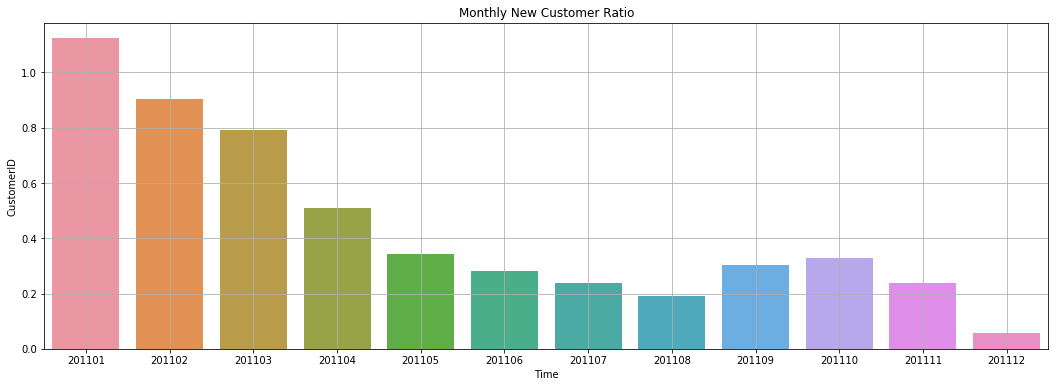

In [46]:
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x ="InvoiceYearMonth", y="CustomerID", data = uk_new)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly New Customer Ratio")
plt.show()

## Metric: Retention Rate

In [47]:
## retention rate: existing customers from last month/active customers total
tx_retention = uk_new_data[['CustomerID','InvoiceYearMonth','Revenue']].groupby(['CustomerID','InvoiceYearMonth']).sum().reset_index()
tx_retention.head(10)

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
5,12747.0,201106,376.30
6,12747.0,201108,301.70
7,12747.0,201110,675.38
8,12747.0,201111,312.73
9,12747.0,201112,438.50


In [48]:
tx_retent_cross = pd.crosstab(tx_retention['CustomerID'],tx_retention['InvoiceYearMonth'])
tx_retent_cross.head(10)

InvoiceYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
12821.0,0,0,0,0,0,1,0,0,0,0,0,0,0
12822.0,0,0,0,0,0,0,0,0,0,1,0,0,0
12823.0,0,0,1,1,0,0,0,0,1,1,0,0,0
12824.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
## store the new table into an array, with each record stored as dictionary. This way
## it can be eaier coverted to pandas dataframe later
index = tx_retent_cross.columns[1:len(tx_retent_cross.columns)-1]
retention_array=[]

In [64]:
for i in range(len(index)-1):
    retention_data = {}
    cur_month = index[i+1]
    pre_month = index[i]
    retention_data['Month']=cur_month
    retention_data['UserCount']=tx_retent_cross[cur_month].sum()
    retention_data['RetentUserCount']=tx_retent_cross[(tx_retent_cross[cur_month]>0) & (tx_retent_cross[pre_month]>0)][cur_month].sum()
    retention_array.append(retention_data)

In [65]:
retention_array

[{'Month': 201102, 'UserCount': 714, 'RetentUserCount': 263},
 {'Month': 201103, 'UserCount': 923, 'RetentUserCount': 305},
 {'Month': 201104, 'UserCount': 817, 'RetentUserCount': 310},
 {'Month': 201105, 'UserCount': 985, 'RetentUserCount': 369},
 {'Month': 201106, 'UserCount': 943, 'RetentUserCount': 417},
 {'Month': 201107, 'UserCount': 899, 'RetentUserCount': 379},
 {'Month': 201108, 'UserCount': 867, 'RetentUserCount': 391},
 {'Month': 201109, 'UserCount': 1177, 'RetentUserCount': 417},
 {'Month': 201110, 'UserCount': 1285, 'RetentUserCount': 502},
 {'Month': 201111, 'UserCount': 1548, 'RetentUserCount': 616}]

In [66]:
retention_table = pd.DataFrame(retention_array)
retention_table['RetentionRate'] = round((retention_table['RetentUserCount']+0.0)/retention_table['UserCount'],2)
retention_table.head()

,Month,RetentUserCount,UserCount,RetentionRate
0,201102,263,714,0.37
1,201103,305,923,0.33
2,201104,310,817,0.38
3,201105,369,985,0.37
4,201106,417,943,0.44


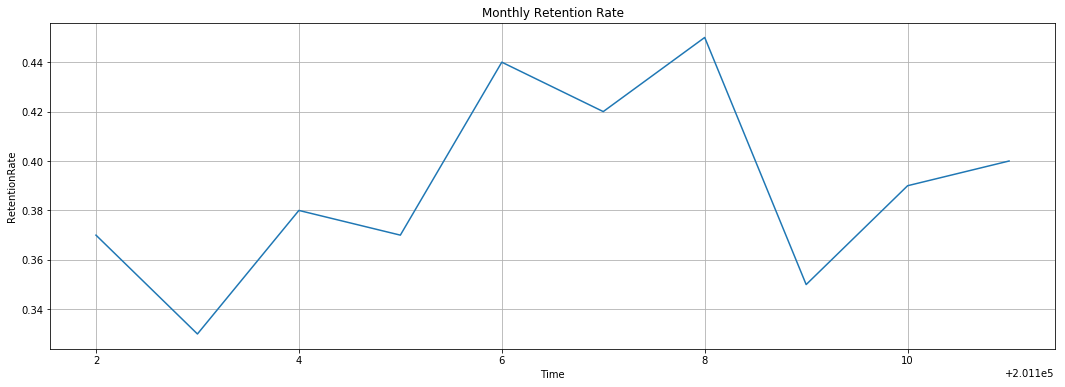

In [69]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="Month", y="RetentionRate",markers=True, data = retention_table)
plt.grid(True)
plt.xlabel("Time")
plt.title("Monthly Retention Rate")
plt.show()

# Part 2: Customer Segmentation

In [70]:
## In general, we will segment the customer by three perspects, recency, frequency, and Monetary (RFM).
## Recency: the nearest time that active 

## Recency

In [37]:
## find the unique ID, and then find the nearest invoice purchase day, calculate the distance.

uk_data.head(10)
user_table = pd.DataFrame(uk_data['CustomerID'].unique())
user_table.columns = ['CustomerID']

purchase_table = uk_data[['CustomerID','InvoiceDate1']].groupby('CustomerID').max().reset_index()
purchase_table.columns = ['CustomerID','LatestPurchase']
purchase_table['Recency'] = (purchase_table['LatestPurchase'].max()-purchase_table['LatestPurchase']).dt.days
uk_user = pd.merge(user_table, purchase_table, on='CustomerID')

uk_user.head(10)

,CustomerID,LatestPurchase,Recency
0,17850.0,2011-02-10 14:38:00,301
1,13047.0,2011-11-08 12:10:00,31
2,13748.0,2011-09-05 09:45:00,95
3,15100.0,2011-01-13 17:09:00,329
4,15291.0,2011-11-14 11:02:00,25
5,14688.0,2011-12-02 12:26:00,7
6,17809.0,2011-11-23 13:00:00,15
7,15311.0,2011-12-09 12:00:00,0
8,14527.0,2011-12-07 12:19:00,2
9,16098.0,2011-09-13 09:59:00,87


In [38]:
uk_user['Recency'].describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


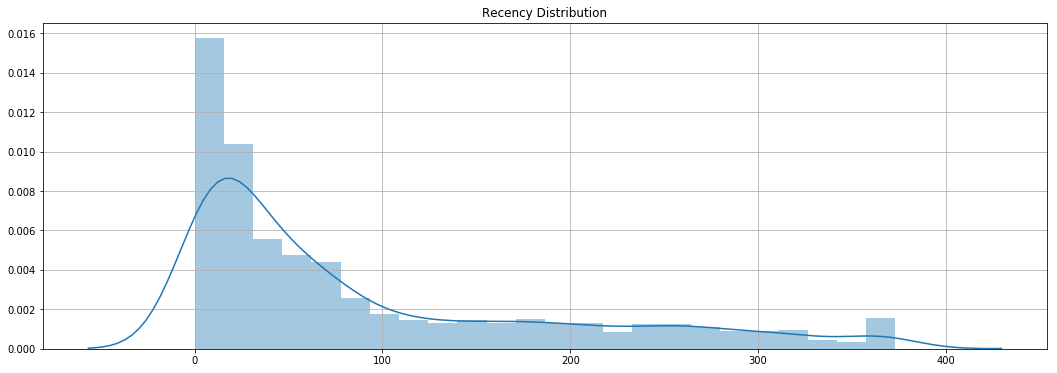

In [39]:
fig, ax = plt.subplots(figsize = (18,6))
sns.distplot(uk_user[['Recency']])
plt.grid(True)
plt.title("Recency Distribution")
plt.show()

In [40]:
## K Means Cluster Model. Elbow Method to determine the optimal k
## https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from sklearn.cluster import KMeans

sse = []
uk_recency = uk_user[['Recency']]
for k in range(1,10):
    temp = {}
    kmeans = KMeans(n_clusters=k,max_iter = 1000).fit(uk_recency[['Recency']])
    uk_recency.loc[:,'cluster_'+str(k)]=kmeans.labels_
    temp['cluster']=k
    temp['sse']=kmeans.inertia_
    sse.append(temp)


C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
sse = pd.DataFrame(sse)
sse.head()

,cluster,sse
0,1,3.967214e+07
1,2,8.179631e+06
2,3,3.895369e+06
3,4,2.219888e+06
4,5,1.371808e+06


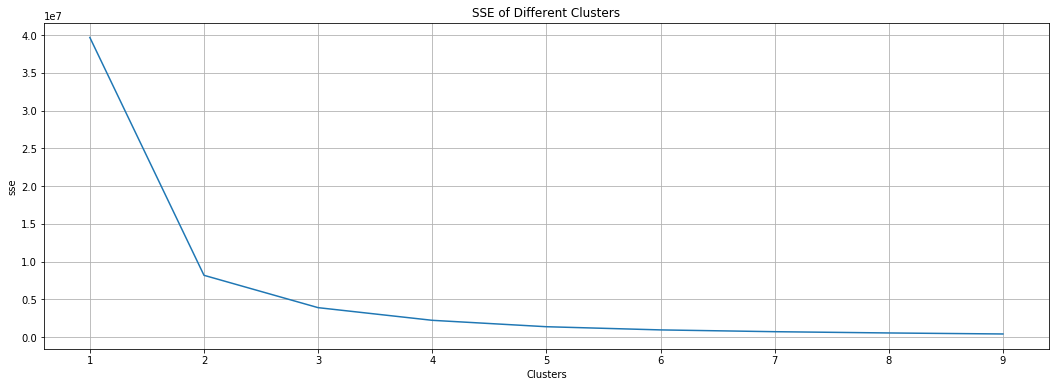

In [42]:
fig, ax = plt.subplots(figsize = (18,6))
sns.lineplot(x ="cluster", y="sse", data = sse)
plt.grid(True)
plt.xlabel("Clusters")
plt.title("SSE of Different Clusters")
plt.show()

In [43]:
uk_recency.head()

,Recency,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,301,0,1,0,2,2,1,1,2,2
1,31,0,0,1,1,4,0,0,6,0
2,95,0,0,2,3,0,2,4,3,3
3,329,0,1,0,2,2,3,3,2,2
4,25,0,0,1,1,4,0,0,6,0


In [44]:
## Based on the chart above, we could select clusters equal 3 or 4. Use 4 in this example
kmeans = KMeans(n_clusters=4,max_iter = 1000)
kmeans.fit(uk_user[['Recency']])
uk_user['RecencyCluster']=kmeans.predict(uk_user[['Recency']])
uk_user.head(10)

,CustomerID,LatestPurchase,Recency,RecencyCluster
0,17850.0,2011-02-10 14:38:00,301,0
1,13047.0,2011-11-08 12:10:00,31,1
2,13748.0,2011-09-05 09:45:00,95,3
3,15100.0,2011-01-13 17:09:00,329,0
4,15291.0,2011-11-14 11:02:00,25,1
5,14688.0,2011-12-02 12:26:00,7,1
6,17809.0,2011-11-23 13:00:00,15,1
7,15311.0,2011-12-09 12:00:00,0,1
8,14527.0,2011-12-07 12:19:00,2,1
9,16098.0,2011-09-13 09:59:00,87,3


In [45]:
uk_agg = uk_user[['Recency','RecencyCluster']].groupby('RecencyCluster').agg(['count','mean','std','min','median','max']).sort_values(by = ('Recency','mean'),ascending=False).reset_index(drop=True)
uk_agg 

Recency                                        
    count        mean        std  min median  max
0     478  304.393305  41.183489  245  300.0  373
1     568  184.625000  31.753602  132  184.0  244
2     954   77.679245  22.850898   48   72.5  131
3    1950   17.488205  13.237058    0   16.0   47

In [46]:
uk_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
(Recency, count)     4 non-null int64
(Recency, mean)      4 non-null float64
(Recency, std)       4 non-null float64
(Recency, min)       4 non-null int64
(Recency, median)    4 non-null float64
(Recency, max)       4 non-null int64
dtypes: float64(3), int64(3)
memory usage: 272.0 bytes


In [47]:
test = uk_user[['Recency','RecencyCluster']].groupby('RecencyCluster').mean().reset_index()
test

,RecencyCluster,Recency
0,0,304.393305
1,1,17.488205
2,2,184.625000
3,3,77.679245


## Frequency

In [48]:
uk_freq = uk_data.groupby('CustomerID')['InvoiceDate1'].count().reset_index()
uk_freq.columns = ['CustomerID','Frequency']
uk_freq.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59
5,12821.0,6
6,12822.0,47
7,12823.0,5
8,12824.0,25
9,12826.0,94


In [49]:
uk_user = pd.merge(uk_user, uk_freq, on='CustomerID')
uk_user.head(10)

,CustomerID,LatestPurchase,Recency,RecencyCluster,Frequency
0,17850.0,2011-02-10 14:38:00,301,0,312
1,13047.0,2011-11-08 12:10:00,31,1,196
2,13748.0,2011-09-05 09:45:00,95,3,28
3,15100.0,2011-01-13 17:09:00,329,0,6
4,15291.0,2011-11-14 11:02:00,25,1,109
5,14688.0,2011-12-02 12:26:00,7,1,359
6,17809.0,2011-11-23 13:00:00,15,1,64
7,15311.0,2011-12-09 12:00:00,0,1,2491
8,14527.0,2011-12-07 12:19:00,2,1,1011
9,16098.0,2011-09-13 09:59:00,87,3,67


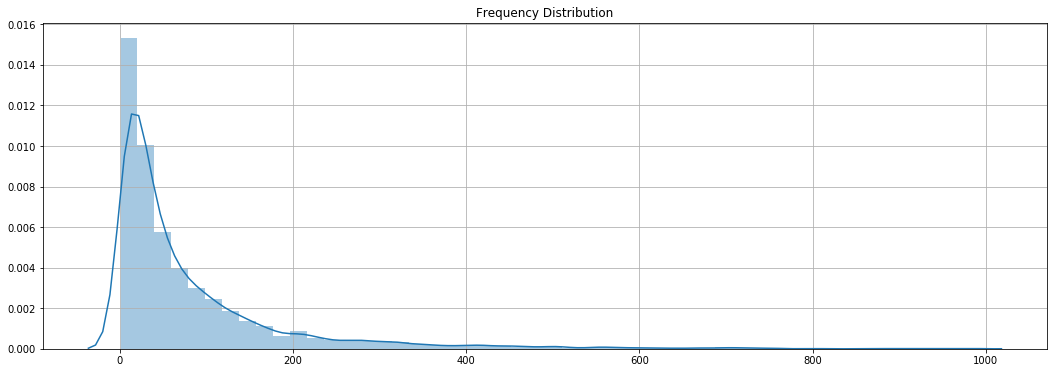

In [52]:
fig, ax = plt.subplots(figsize = (18,6))
sns.distplot(uk_user[uk_user['Frequency']<=1000][['Frequency']])
plt.grid(True)
plt.title("Frequency Distribution")
plt.show()

In [54]:
uk_user[['Frequency']].describe()

,Frequency
count,3950.000000
mean,91.614684
std,220.557389
min,1.000000
25%,17.000000
50%,41.000000
75%,101.000000
max,7983.000000


In [56]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(uk_user[['Frequency']])
uk_user['Frequency_Cluster']=kmeans.predict(uk_user[['Frequency']])


In [57]:
uk_user.head()

,CustomerID,LatestPurchase,Recency,RecencyCluster,Frequency,Frequency_Cluster
0,17850.0,2011-02-10 14:38:00,301,0,312,3
1,13047.0,2011-11-08 12:10:00,31,1,196,3
2,13748.0,2011-09-05 09:45:00,95,3,28,0
3,15100.0,2011-01-13 17:09:00,329,0,6,0
4,15291.0,2011-11-14 11:02:00,25,1,109,0


In [70]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [77]:
tx_user = order_cluster('RecencyCluster', 'Recency',uk_user,False)

In [78]:
tx_user = order_cluster('Frequency_Cluster', 'Frequency',tx_user,True)
tx_user.head(10)

,CustomerID,LatestPurchase,Recency,Frequency,RecencyCluster,Frequency_Cluster
0,17850.0,2011-02-10 14:38:00,301,312,0,1
1,15808.0,2011-02-06 14:33:00,305,210,0,1
2,13047.0,2011-11-08 12:10:00,31,196,3,1
3,14688.0,2011-12-02 12:26:00,7,359,3,1
4,16029.0,2011-11-01 10:27:00,38,274,3,1
5,13408.0,2011-12-08 09:05:00,1,501,3,1
6,13767.0,2011-12-07 15:00:00,1,399,3,1
7,13448.0,2011-11-23 12:33:00,16,199,3,1
8,15513.0,2011-11-08 16:21:00,30,314,3,1
9,17920.0,2011-12-05 14:29:00,3,696,3,1


In [79]:
tx_user.groupby('Frequency_Cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Cluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


In [80]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


In [81]:
## in general, higher score means better customer (more frequent, more closer)


## Revenue

In [84]:
uk_data['Revenue']=uk_data['UnitPrice']*uk_data['Quantity']
uk_revenue = uk_data.groupby('CustomerID')['Revenue'].sum().reset_index()
uk_revenue.head(10)

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34
5,12821.0,92.72
6,12822.0,918.98
7,12823.0,1759.50
8,12824.0,397.12
9,12826.0,1468.12


In [85]:
tx_user = pd.merge(tx_user,uk_revenue,on='CustomerID')
tx_user.head(10)

,CustomerID,LatestPurchase,Recency,Frequency,RecencyCluster,Frequency_Cluster,Revenue
0,17850.0,2011-02-10 14:38:00,301,312,0,1,5288.63
1,15808.0,2011-02-06 14:33:00,305,210,0,1,3724.77
2,13047.0,2011-11-08 12:10:00,31,196,3,1,3079.10
3,14688.0,2011-12-02 12:26:00,7,359,3,1,5107.38
4,16029.0,2011-11-01 10:27:00,38,274,3,1,50992.61
5,13408.0,2011-12-08 09:05:00,1,501,3,1,27487.41
6,13767.0,2011-12-07 15:00:00,1,399,3,1,16945.71
7,13448.0,2011-11-23 12:33:00,16,199,3,1,3465.67
8,15513.0,2011-11-08 16:21:00,30,314,3,1,14520.08
9,17920.0,2011-12-05 14:29:00,3,696,3,1,4204.10


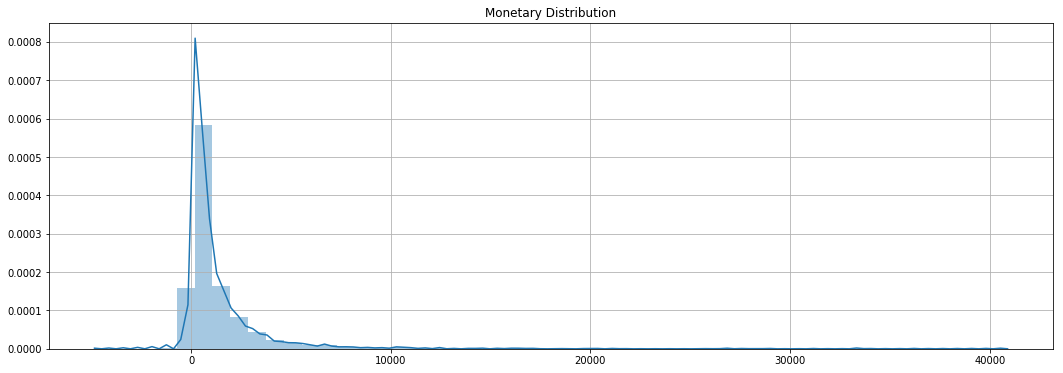

In [88]:
fig, ax = plt.subplots(figsize = (18,6))
sns.distplot(tx_user[tx_user['Revenue']<=50000][['Revenue']])
plt.grid(True)
plt.title("Monetary Distribution")
plt.show()

In [89]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['Revenue_Cluster']=kmeans.predict(tx_user[['Revenue']])
tx_user = order_cluster('Revenue_Cluster','Revenue',tx_user,True)
tx_user.head(10)

,CustomerID,LatestPurchase,Recency,Frequency,RecencyCluster,Frequency_Cluster,Revenue,Revenue_Cluster
0,17850.0,2011-02-10 14:38:00,301,312,0,1,5288.63,1
1,14688.0,2011-12-02 12:26:00,7,359,3,1,5107.38,1
2,13767.0,2011-12-07 15:00:00,1,399,3,1,16945.71,1
3,15513.0,2011-11-08 16:21:00,30,314,3,1,14520.08,1
4,14849.0,2011-11-18 10:58:00,21,392,3,1,7904.28,1
5,12921.0,2011-12-06 09:56:00,3,741,3,1,16389.74,1
6,13468.0,2011-12-08 10:39:00,1,306,3,1,5656.75,1
7,17690.0,2011-11-09 15:17:00,29,258,3,1,4748.45,1
8,17017.0,2011-12-07 09:32:00,2,268,3,1,8574.11,1
9,15601.0,2011-11-28 15:15:00,10,414,3,1,6745.36,1


In [92]:
tx_user.groupby('Revenue_Cluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue_Cluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


## Overall Score

In [96]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['Frequency_Cluster'] + tx_user['Revenue_Cluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].agg(['mean','median'])


Recency           Frequency                Revenue           
                    mean median         mean  median           mean     median
OverallScore                                                                  
0             304.584388    300    21.995781    15.0     303.339705    242.170
1             185.362989    184    32.596085    22.0     498.087546    321.005
2              78.991304     73    46.963043    31.0     868.082991    568.745
3              20.689610     18    68.419590    54.0    1091.416414    768.080
4              14.892617     10   271.755034   237.0    3607.097114   2956.380
5               9.662162      6   373.290541   321.5    9136.946014   6571.110
6               7.740741      3   876.037037   898.0   22777.914815  11713.850
7               1.857143      2  1272.714286  1076.0  103954.025714  59419.340
8               1.333333      1  5917.666667  5128.0   42177.930000  40340.780

In [99]:

score_dist = tx_user.groupby('OverallScore')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Count'})
score_dist.head(10)

,OverallScore,Count
0,0,474
1,1,562
2,2,920
3,3,1511
4,4,298
5,5,148
6,6,27
7,7,7
8,8,3


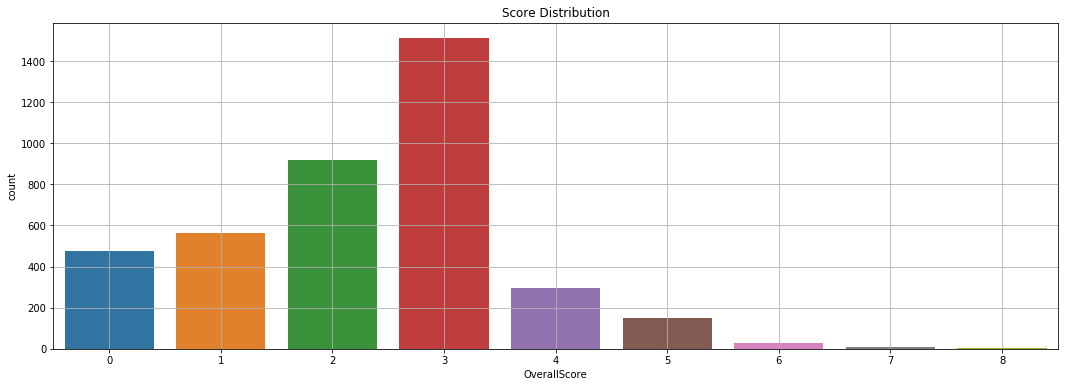

In [101]:
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x='OverallScore',data=tx_user)
plt.grid(True)
plt.title("Score Distribution")
plt.show()

In [102]:
tx_user['Segment']='Low'
tx_user.loc[tx_user['OverallScore']>2,'Segment']='Mid'
tx_user.loc[tx_user['OverallScore']>4,'Segment']='High'

In [103]:
tx_user.head(10)

,CustomerID,LatestPurchase,Recency,Frequency,RecencyCluster,Frequency_Cluster,Revenue,Revenue_Cluster,OverallScore,Segment
0,17850.0,2011-02-10 14:38:00,301,312,0,1,5288.63,1,2,Low
1,14688.0,2011-12-02 12:26:00,7,359,3,1,5107.38,1,5,High
2,13767.0,2011-12-07 15:00:00,1,399,3,1,16945.71,1,5,High
3,15513.0,2011-11-08 16:21:00,30,314,3,1,14520.08,1,5,High
4,14849.0,2011-11-18 10:58:00,21,392,3,1,7904.28,1,5,High
5,12921.0,2011-12-06 09:56:00,3,741,3,1,16389.74,1,5,High
6,13468.0,2011-12-08 10:39:00,1,306,3,1,5656.75,1,5,High
7,17690.0,2011-11-09 15:17:00,29,258,3,1,4748.45,1,5,High
8,17017.0,2011-12-07 09:32:00,2,268,3,1,8574.11,1,5,High
9,15601.0,2011-11-28 15:15:00,10,414,3,1,6745.36,1,5,High


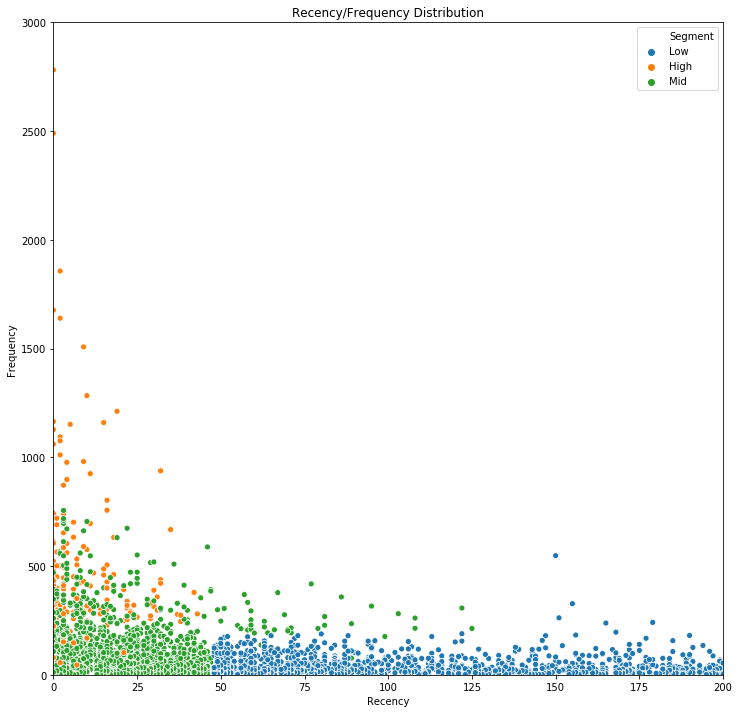

In [107]:
fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(x='Recency',y='Frequency',data=tx_user,hue='Segment')
plt.title("Recency/Frequency Distribution")
plt.xlim(0,200)
plt.ylim(0,3000)
plt.show()

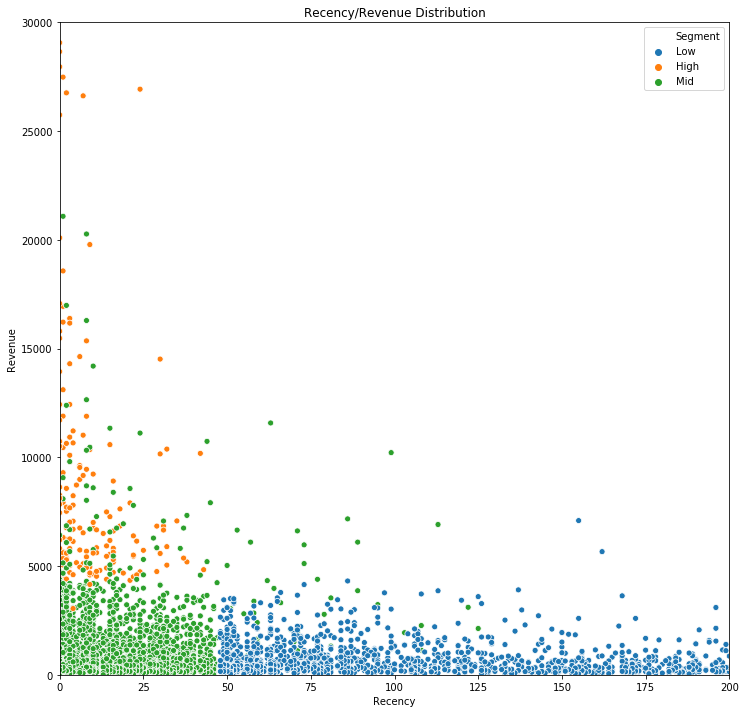

In [110]:
fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(x='Recency',y='Revenue',data=tx_user,hue='Segment')
plt.title("Recency/Revenue Distribution")
plt.xlim(0,200)
plt.ylim(0,30000)
plt.show()

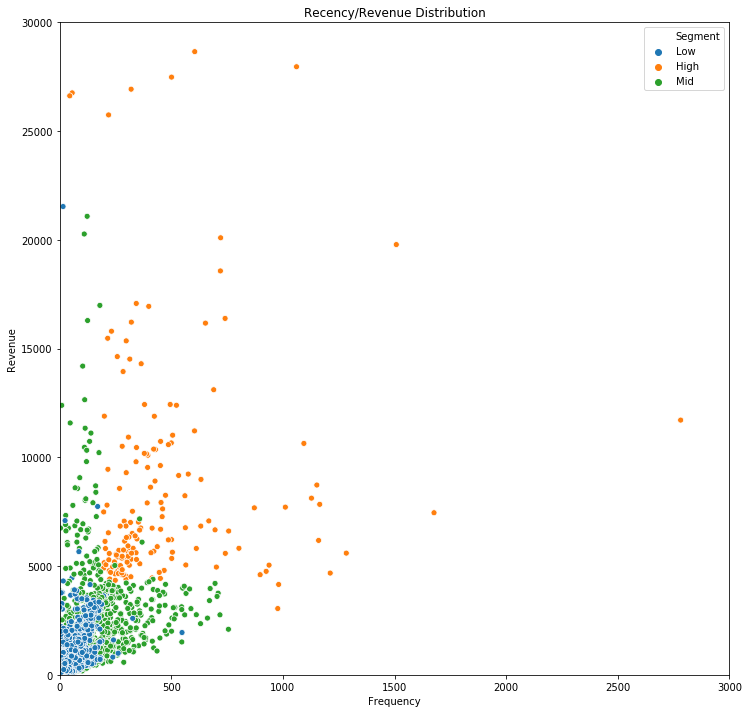

In [111]:
fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(x='Frequency',y='Revenue',data=tx_user,hue='Segment')
plt.title("Recency/Revenue Distribution")
plt.xlim(0,3000)
plt.ylim(0,30000)
plt.show()

In [112]:
## For low value customer, key strategy is to increase frequency
## For mid value customer, key is to increase both retention and frequency
## For high value customer, key is to increase retention

# Part 3: Predict Life Time Value

In [3]:
## Lifetime Value: Total Gross Revenue - Total Cost. Idea is to use short term behavior to predict long term value
## Cost is what We invest in customers (acquisition costs, offline ads, promotions, discounts & etc.) to generate revenue and be profitable. 
## knowing the historical score is not the purpose, use the concept to predict the future value is the key

In [3]:
'''
steps:
1.Define an appropriate time frame for Customer Lifetime Value calculation
2.Identify the features we are going to use to predict future and create them
3.Calculate lifetime value (LTV) for training the machine learning model
4.Build and run the machine learning model
5.Check if the model is useful
'''

'\nsteps:\n1.Define an appropriate time frame for Customer Lifetime Value calculation\n2.Identify the features we are going to use to predict future and create them\n3.Calculate lifetime value (LTV) for training the machine learning model\n4.Build and run the machine learning model\n5.Check if the model is useful\n'

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from datetime import date

In [5]:
raw_data['InvoiceDate'] = pd.to_datetime(raw_data['InvoiceDate'])
tx_uk = raw_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [6]:
## create 3 month data and 6 month data
tx_3m = tx_uk[(tx_uk.InvoiceDate < date(2011,6,1)) & (tx_uk.InvoiceDate >= date(2011,3,1))].reset_index(drop=True)
tx_6m = tx_uk[(tx_uk.InvoiceDate >= date(2011,6,1)) & (tx_uk.InvoiceDate < date(2011,12,1))].reset_index(drop=True)


C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
tx_user = pd.DataFrame(tx_3m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [8]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [9]:
## calculate 3 month data recency

tx_max_purchase = tx_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [10]:
tx_user.head(10)

,CustomerID,Recency,RecencyCluster
0,14620.0,12,3
1,14740.0,4,3
2,17068.0,11,3
3,12971.0,4,3
4,15194.0,6,3
5,18044.0,5,3
6,18075.0,12,3
7,15241.0,0,3
8,17811.0,7,3
9,15311.0,4,3


In [11]:
## Calculate 3 month Frequency score

tx_frequency = tx_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

In [12]:
## Calculate 3 month Revenue

tx_3m['Revenue'] = tx_3m['UnitPrice'] * tx_3m['Quantity']
tx_revenue = tx_3m.groupby('CustomerID').Revenue.sum().reset_index()
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)


In [13]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [14]:
## Since there is no cost in the dataset, we use revenue to proxy Lifetime value (LTV)
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_user_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID','m6_Revenue']

C:\Users\lizil\Downloads\Pycharm\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


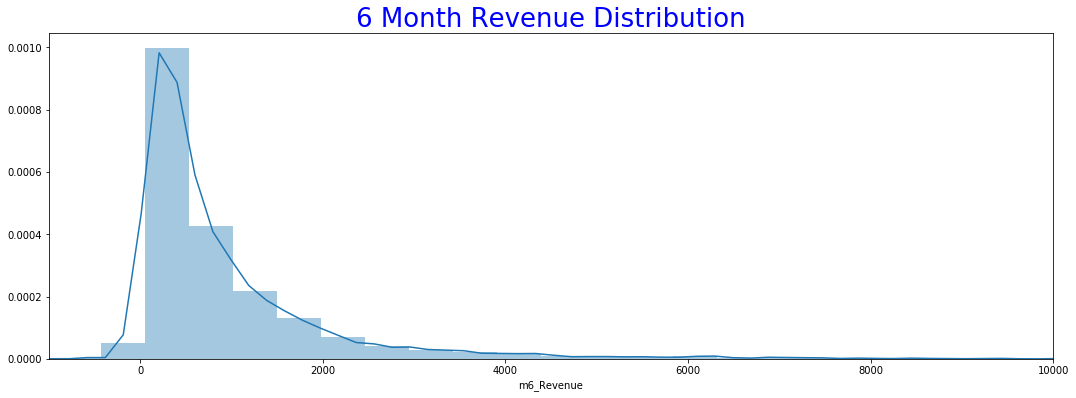

In [15]:
fig, ax = plt.subplots(figsize = (18,6))
sns.distplot(tx_user_6m[tx_user_6m['m6_Revenue']<=20000]['m6_Revenue'])
ax.set_xlim(-1000,10000)
ax.set_title("6 Month Revenue Distribution",fontsize = 26,color = "blue")
plt.show()

In [40]:
# Merge the 3m and 6m data
tx_merge = pd.merge(tx_user, tx_user_6m, on='CustomerID', how='left')
tx_merge = tx_merge.fillna(0)

In [17]:
tx_merge.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value,3232.20
2,18044.0,5,3,57,0,808.96,0,3,Mid-Value,991.54
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value,791.04
5,15660.0,4,3,34,0,484.62,0,3,Mid-Value,858.09
6,14676.0,15,3,18,0,1144.77,0,3,Mid-Value,1399.72
7,12747.0,6,3,35,0,1082.09,0,3,Mid-Value,1666.11
8,13599.0,6,3,47,0,1254.18,0,3,Mid-Value,2799.12
9,14560.0,3,3,12,0,562.28,0,3,Mid-Value,911.33


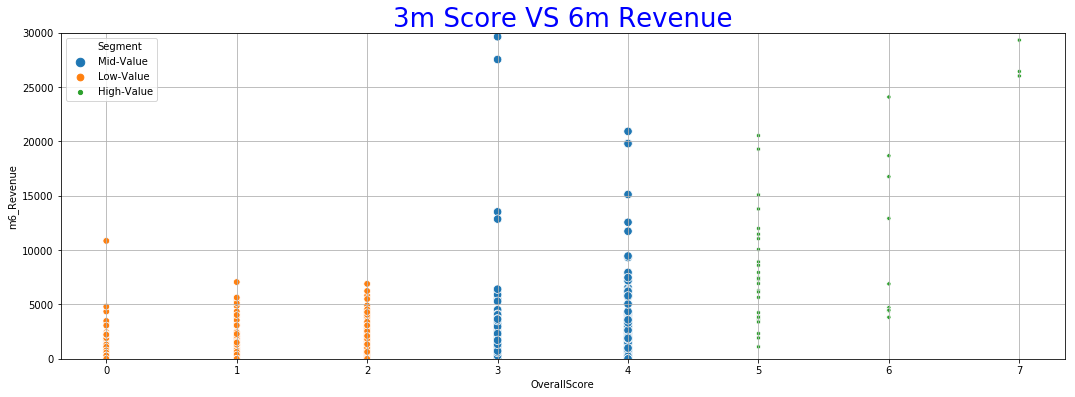

In [26]:
fig, ax = plt.subplots(figsize = (18,6))
sns.scatterplot(x='OverallScore',y='m6_Revenue',hue='Segment',size='Segment',data=tx_merge)
ax.set_ylim(0,30000)
plt.grid(True)
ax.set_title("3m Score VS 6m Revenue",fontsize = 26,color = "blue")
plt.show()

In [27]:
"""
our goal is to predict the LTV. LTV originally is a continuous, but we can decide
whether do a continuous prediction, or covert it into categories and then do a
classification

Here we use KMeans to cluster it into 3 groups then do classification
"""


'\nour goal is to predict the LTV. LTV originally is a continuous, but we can decide\nwhether do a continuous prediction, or covert it into categories and then do a\nclassification\n\nHere we use KMeans to cluster it into 3 groups then do classification\n'

In [41]:
## Remove outlier and then KMeans to cluster the dependent variable
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

In [42]:
## deepcopy VS copy
tx_cluster = tx_merge.copy()
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


In [43]:
"""
steps before fitting the model:
1.Need to do some feature engineering. We should convert categorical columns to numerical columns.
2.We will check the correlation of features against our label, LTV clusters.
3.We will split our feature set and label (LTV) as X and y. We use X to predict y.
4.Will create Training and Test dataset. 
"""



'\nsteps before fitting the model:\n1.Need to do some feature engineering. We should convert categorical columns to numerical columns.\n2.We will check the correlation of features against our label, LTV clusters.\n3.We will split our feature set and label (LTV) as X and y. We use X to predict y.\n4.Will create Training and Test dataset. \n'

In [44]:
## covert categorical strings to dummy values

tx_class = pd.get_dummies(tx_cluster)


In [45]:
tx_class.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,14620.0,12,3,30,0,393.28,0,3,0.00,0,0,0,1
1,18044.0,5,3,57,0,808.96,0,3,991.54,0,0,0,1
2,18075.0,12,3,35,0,638.12,0,3,1322.75,0,0,0,1
3,15241.0,0,3,64,0,947.55,0,3,791.04,0,0,0,1
4,15660.0,4,3,34,0,484.62,0,3,858.09,0,0,0,1
5,14676.0,15,3,18,0,1144.77,0,3,1399.72,0,0,0,1
6,14560.0,3,3,12,0,562.28,0,3,911.33,0,0,0,1
7,16389.0,13,3,16,0,670.17,0,3,692.10,0,0,0,1
8,17961.0,3,3,68,0,263.96,0,3,422.05,0,0,0,1
9,13094.0,13,3,9,0,481.44,0,3,774.78,0,0,0,1


In [46]:
#calculate and show correlations
corr_matrix = tx_class.corr()

In [47]:
corr_matrix

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
CustomerID,1.000000,-0.002528,0.006726,-0.041699,-0.001735,-0.059981,-0.047238,-0.002030,-0.039158,-0.028401,-0.056361,0.005218,0.011095
Recency,-0.002528,1.000000,-0.965208,-0.255674,-0.217506,-0.310914,-0.179093,-0.914184,-0.250921,-0.237249,-0.156301,0.731302,-0.695528
RecencyCluster,0.006726,-0.965208,1.000000,0.250344,0.209192,0.313290,0.176243,0.941402,0.250437,0.236899,0.163127,-0.807441,0.770688
Frequency,-0.041699,-0.255674,0.250344,1.000000,0.789243,0.493238,0.342000,0.477578,0.374258,0.359601,0.468716,-0.334609,0.202790
FrequencyCluster,-0.001735,-0.217506,0.209192,0.789243,1.000000,0.457022,0.315209,0.494029,0.377632,0.366366,0.423924,-0.351350,0.232772
Revenue,-0.059981,-0.310914,0.313290,0.493238,0.457022,1.000000,0.785027,0.512299,0.738058,0.600491,0.576390,-0.364761,0.202044
RevenueCluster,-0.047238,-0.179093,0.176243,0.342000,0.315209,0.785027,1.000000,0.390422,0.620111,0.468226,0.686128,-0.243081,0.046861
OverallScore,-0.002030,-0.914184,0.941402,0.477578,0.494029,0.512299,0.390422,1.000000,0.411631,0.373408,0.359228,-0.824220,0.730690
m6_Revenue,-0.039158,-0.250921,0.250437,0.374258,0.377632,0.738058,0.620111,0.411631,1.000000,0.845933,0.474441,-0.284336,0.150189
LTVCluster,-0.028401,-0.237249,0.236899,0.359601,0.366366,0.600491,0.468226,0.373408,0.845933,1.000000,0.353218,-0.266008,0.166854


In [48]:
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.845933
Revenue               0.600491
RevenueCluster        0.468226
OverallScore          0.373408
FrequencyCluster      0.366366
Frequency             0.359601
Segment_High-Value    0.353218
RecencyCluster        0.236899
Segment_Mid-Value     0.166854
CustomerID           -0.028401
Recency              -0.237249
Segment_Low-Value    -0.266008
Name: LTVCluster, dtype: float64

In [49]:
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

In [52]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: LTVCluster, dtype: int64

In [53]:
#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [56]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.91
Accuracy of XGB classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        70
           1       0.78      0.39      0.52        18
           2       0.40      0.50      0.44         4

   micro avg       0.85      0.85      0.85        92
   macro avg       0.69      0.62      0.63        92
weighted avg       0.84      0.85      0.83        92



In [59]:
## The model worked well on predicting group 0, but failed to predict well on group
## 1 and 2 because the precision and recall rate is too low

"""
Steps:
1.Adding more features and improve feature engineering
2.Try different models other than XGBoost
3.Apply hyper parameter tuning to current model
4.Add more data to the model if possible
"""


'\nSteps:\n1.Adding more features and improve feature engineering\n2.Try different models other than XGBoost\n3.Apply hyper parameter tuning to current model\n4.Add more data to the model if possible\n'